In [26]:
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

17.8 µs ± 2.83 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
lat=np.random.uniform(-90,90,size=1500)
lon=np.random.uniform(-180,180,size=1500)
lat_lon = zip(lat,lon)
coordinates=list(lat_lon)

In [29]:
from citipy import citipy

In [30]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [31]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [32]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a83fa421a7c325cdd136dea827acee1


In [33]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5a83fa421a7c325cdd136dea827acee1&q=Boston


In [34]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 63,
  'feels_like': 62.62,
  'temp_min': 58.28,
  'temp_max': 66.42,
  'pressure': 1016,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 1.99, 'deg': 292, 'gust': 7},
 'clouds': {'all': 28},
 'dt': 1633221799,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1633171351,
  'sunset': 1633213457},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [35]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [36]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [37]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | pittsburg
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | cortez
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | ziro
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | amderma
City not found. Skipping...
Processing Record 18 of Set 1 | qandahar
City not found. Skipping...
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | qaanaaq
Proce

Processing Record 37 of Set 4 | alotau
City not found. Skipping...
Processing Record 38 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | dingle
Processing Record 41 of Set 4 | clyde river
Processing Record 42 of Set 4 | hofn
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | saint matthews
Processing Record 45 of Set 4 | sorvag
City not found. Skipping...
Processing Record 46 of Set 4 | provideniya
Processing Record 47 of Set 4 | zachagansk
City not found. Skipping...
Processing Record 48 of Set 4 | chapais
Processing Record 49 of Set 4 | zyryanka
Processing Record 50 of Set 4 | tabou
Processing Record 1 of Set 5 | cabo san lucas
Processing Record 2 of Set 5 | arvika
Processing Record 3 of Set 5 | esperance
Processing Record 4 of Set 5 | dahuk
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | svetlaya
Processing Record 7 of Set 5 | srednekolymsk
Processing Record 8 of Set 5 

Processing Record 24 of Set 8 | kelapa sawit
Processing Record 25 of Set 8 | pontes e lacerda
Processing Record 26 of Set 8 | atambua
Processing Record 27 of Set 8 | kamenka
Processing Record 28 of Set 8 | alencon
Processing Record 29 of Set 8 | mezen
Processing Record 30 of Set 8 | eyl
Processing Record 31 of Set 8 | martil
Processing Record 32 of Set 8 | la palma
Processing Record 33 of Set 8 | mahenge
Processing Record 34 of Set 8 | okahandja
Processing Record 35 of Set 8 | anshan
Processing Record 36 of Set 8 | mount isa
Processing Record 37 of Set 8 | kaura namoda
Processing Record 38 of Set 8 | narsaq
Processing Record 39 of Set 8 | brokopondo
Processing Record 40 of Set 8 | umm lajj
Processing Record 41 of Set 8 | hay river
Processing Record 42 of Set 8 | laguna
Processing Record 43 of Set 8 | henties bay
Processing Record 44 of Set 8 | statesboro
Processing Record 45 of Set 8 | zyryanskoye
Processing Record 46 of Set 8 | kontagora
Processing Record 47 of Set 8 | chumikan
Proces

Processing Record 12 of Set 12 | barquisimeto
Processing Record 13 of Set 12 | deputatskiy
Processing Record 14 of Set 12 | petit goave
Processing Record 15 of Set 12 | acarau
Processing Record 16 of Set 12 | kloulklubed
Processing Record 17 of Set 12 | barmer
Processing Record 18 of Set 12 | porto novo
Processing Record 19 of Set 12 | minot
Processing Record 20 of Set 12 | maceio
Processing Record 21 of Set 12 | gat
Processing Record 22 of Set 12 | myingyan
Processing Record 23 of Set 12 | swan river
Processing Record 24 of Set 12 | nishihara
Processing Record 25 of Set 12 | vaxjo
Processing Record 26 of Set 12 | bintulu
Processing Record 27 of Set 12 | northam
Processing Record 28 of Set 12 | manfredonia
Processing Record 29 of Set 12 | erenhot
Processing Record 30 of Set 12 | galeana
Processing Record 31 of Set 12 | truth or consequences
Processing Record 32 of Set 12 | kochubey
Processing Record 33 of Set 12 | keningau
Processing Record 34 of Set 12 | tura
Processing Record 35 of S

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Filipe,14.8961,-24.4956,79.45,82,74,11.52,CV,2021-10-03 00:40:49
1,Bethel,41.3712,-73.4140,64.92,86,1,3.44,US,2021-10-03 00:36:18
2,Busselton,-33.6500,115.3333,57.04,49,12,14.50,AU,2021-10-03 00:39:38
3,Hobart,-42.8794,147.3294,58.26,96,75,3.00,AU,2021-10-03 00:36:24
4,Puerto Ayora,-0.7393,-90.3518,73.36,90,63,8.16,EC,2021-10-03 00:39:52
5,Salalah,17.0151,54.0924,80.69,89,75,9.22,OM,2021-10-03 00:40:42
6,Pittsburg,38.0280,-121.8847,95.09,20,1,1.01,US,2021-10-03 00:44:52
7,Bambous Virieux,-20.3428,57.7575,72.21,88,40,11.50,MU,2021-10-03 00:40:36
8,Cortez,37.3489,-108.5859,65.52,45,1,10.36,US,2021-10-03 00:47:27
9,New Norfolk,-42.7826,147.0587,57.90,70,100,3.00,AU,2021-10-03 00:40:47


In [40]:
city_data_df=city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sao Filipe,CV,2021-10-03 00:40:49,14.8961,-24.4956,79.45,82,74,11.52
1,Bethel,US,2021-10-03 00:36:18,41.3712,-73.4140,64.92,86,1,3.44
2,Busselton,AU,2021-10-03 00:39:38,-33.6500,115.3333,57.04,49,12,14.50
3,Hobart,AU,2021-10-03 00:36:24,-42.8794,147.3294,58.26,96,75,3.00
4,Puerto Ayora,EC,2021-10-03 00:39:52,-0.7393,-90.3518,73.36,90,63,8.16


In [42]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

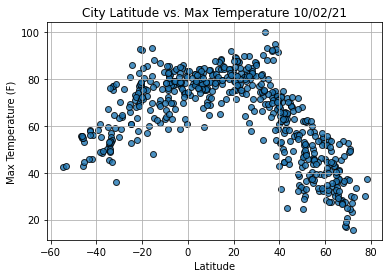

In [45]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

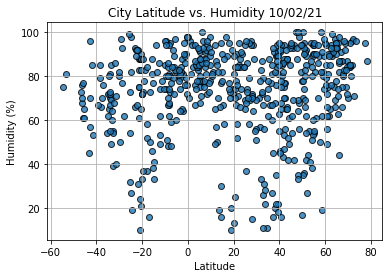

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

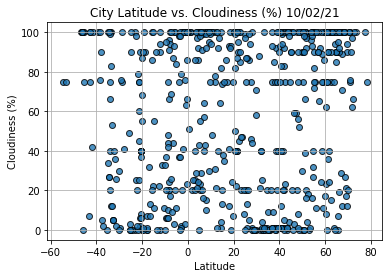

In [47]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

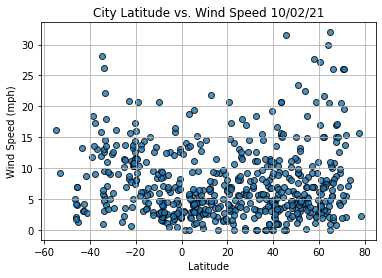

In [48]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [51]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

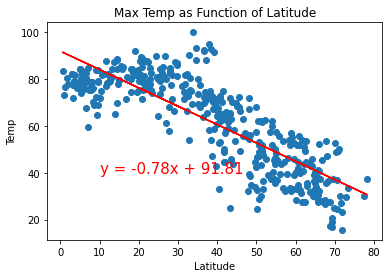

In [54]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Max Temp as Function of Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

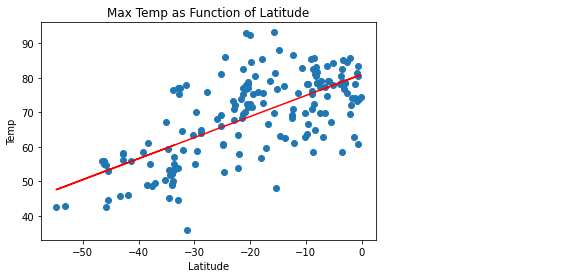

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Max Temp as Function of Latitude")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

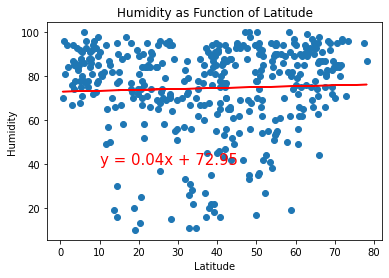

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Humidity as Function of Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

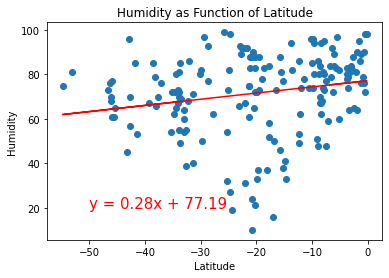

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# print(line_eq)

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")
plt.title("Humidity as Function of Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

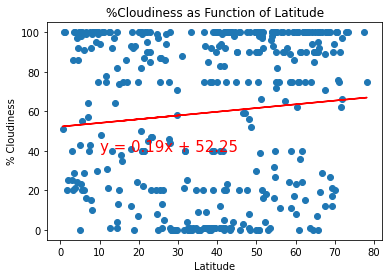

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("%Cloudiness as Function of Latitude")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.show()

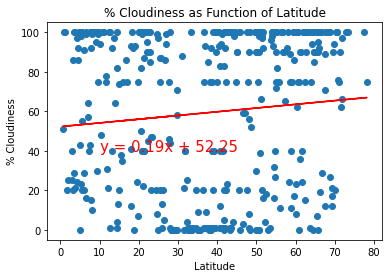

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("% Cloudiness as Function of Latitude")
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.show()

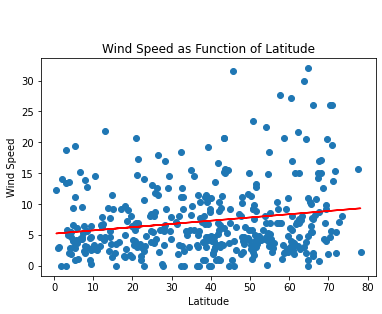

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Wind Speed as Function of Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()